<a href="https://colab.research.google.com/github/Shivam151299/Machine-Learning-/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import math
from tqdm import tqdm
import matplotlib.pyplot as plt

In [12]:
housing = pd.read_csv('/content/housing.csv')
yacht = pd.read_csv('/content/yachtData.csv')
concrete = pd.read_csv('/content/concreteData.csv')

In [13]:
housing

,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
501,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [14]:
housing.values[:,:13].shape

(505, 13)

In [15]:
class LinearRegression():
  def __init__(self, X , y , learningRate, tolerance, maxIteration, batch_size, l, gd = False, sgd = False, reg = False) -> None:
    self.X = housing.values[:,:13]
    self.y = housing.values[:, 13]
    self.learningRate = learningRate
    self.tolerance = tolerance
    self.maxIteration = maxIteration
    self.gd = gd
    self.sgd = sgd
    self.reg = reg
    self.l = l
    self.batch_size = batch_size

  def trainTestSplit(self):
    X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size= 0.3, random_state = 0)    
    return X_train, X_test, y_train, y_test
  
  def add_X0(self, X):
    return np.column_stack([np.ones([X.shape[0], 1]), X])

  def normalize(self, X):
    mean = np.mean(X, 0)
    sd = np.std(X, 0)
    X_norm = (X - mean)/sd
    X_norm = self.add_X0(X_norm)
    return X_norm, mean, sd

  def normalizeTestData(self, X, trainMean, trainsd):
    X_norm = (X-trainMean)/trainsd
    X_norm = self.add_X0(X_norm)
    return X_norm

  def rank(seld, X, eps = 1e-12):
    u, s, vh = np.linalg.svd(X)
    return len([x for x in s if abs(x) > eps])

  def checkMatrix(self, X):
    X_rank = self.rank(X)
    if X_rank == min(X.shape[0], X.shape[1]):
      self.fullRank = True
      print("Data is Full Rank")
    else:
      self.fullRank = False
      print("Data is not Full Rank")

  def checkInvertibility(self, X):
    if X.shape[0] < X.shape[1]:
      self.lowRank = True
      print("Data is low Rank")
    else:
      self.lowRank = False
      print("Data is not low Rank")
    
  def closedFormSolution(self, X, y):
    w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return w

  def gradientDescent(self, X, y):
    errorSequences = []
    last = float('inf')
    for t in tqdm(range(self.maxIteration)):
      self.w = self.w - self.learningRate*self.costDerivation(X, y) + self.l*self.Regularization(self.w)
      cur = self.sse(X, y)
      diff = last - cur
      last = cur
      errorSequences.append(cur)
      
      if t%100 == 0:
        print('epoch:',t,'error:',cur)
      
      if diff < self.tolerance:
        print("The model stopped - no further improvement ended at epoch: ",t)
        break

    plt.plot(errorSequences)
    plt.title('Error vs epoch')
    plt.xlabel('epoches')
    plt.ylabel('error')
    plt.show()


  def sse(self, X, y):
    y_hat = self.predict(X)
    return ((y_hat - y)**2).sum()/len(y)

  def predict(self, X):
    return X.dot(self.w)

  def costFuntion(self, X):
    return self.sse(X, y)/2

  def costDerivation(self, X, y):
    y_hat = self.predict(X)
    return X.T.dot(y_hat - y)

  def Regularization(self, w):
    if self.reg == False:
      return 0
    elif self.reg == True:
      return 2*self.w

  def fit(self):
    self.X_train, self.X_test, self.y_train, self.y_test = self.trainTestSplit()

    self.X_train, self.mean, self.sd = self.normalize(self.X_train)

    self.X_test = self.normalizeTestData(self.X_test, self.mean, self.sd)

    self.checkMatrix(self.X_train)
    self.checkInvertibility(self.X_train)

    if self.fullRank and not self.lowRank and not self.gd and not self.sgd:
      print("Solving using closed form solution")
      self.w = self.closedFormSolution(self.X_train, self.y_train)

    elif not self.sgd:
      print("Solving using Gradient Descent")
      self.w = np.ones(self.X_train.shape[1], dtype = np.float64)*0
      self.gradientDescent(self.X_train, self.y_train)
    
    elif self.sgd:
      print("using using Stochastic Gradient Descent")
      ind = np.random.choice(self.X_train.shape[0], 3, replace=False)
      self.w = np.ones(self.X_train.shape[1], dtype = np.float64)*0
      self.gradientDescent(self.X_train[ind,:], self.y_train[ind])

    print(self.w)
    print('test error:',self.evaluate(self.X_test, self.y_test))

  def evaluate(self, X, y):
    return self.sse(X, y)

FOR Housing data

In [16]:
# closed form
regression = LinearRegression(housing.values[:,:13], housing.values[:, 13], batch_size= 100, learningRate=0.0004, l = 0.01, tolerance = 0.005, maxIteration= 50000)
regression.fit()

Data is Full Rank
Data is not low Rank
Solving using closed form solution
[22.93399433 -0.90751811  1.04796575  0.38867104  0.6622465  -2.17214484
  2.58716716  0.50645061 -2.59559964  2.30818886 -1.67320027 -2.33651383
  0.65618617 -3.99472177]
test error: 21.38160796571934


Data is Full Rank
Data is not low Rank
Solving using Gradient Descent


  0%|          | 75/50000 [00:00<00:05, 9886.01it/s]

epoch: 0 error: 434.1872343200513
The model stopped - no further improvement ended at epoch:  75


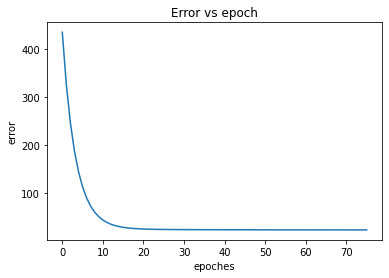

[22.93377743 -0.80913513  0.84884442  0.02551599  0.70993813 -1.71910874
  2.78246422  0.2675656  -2.41418813  1.30825781 -0.72662622 -2.22884647
  0.6571461  -3.85924068]
test error: 21.670564832970843


In [17]:
# gradient descent
regression = LinearRegression(housing.values[:,:13], housing.values[:, 13], learningRate=0.0004,batch_size= 100, l = 0.01, tolerance = 0.005, maxIteration= 50000, gd = True)
regression.fit()

Data is Full Rank
Data is not low Rank
Solving using Gradient Descent


  0%|          | 74/50000 [00:00<00:02, 19759.26it/s]

epoch: 0 error: 434.1872343200513
The model stopped - no further improvement ended at epoch:  74


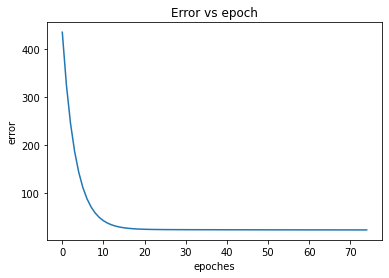

[23.26320072 -0.82345511  0.87611467  0.05407866  0.70419581 -1.81058081
  2.77359118  0.29579783 -2.5116546   1.38912978 -0.7561495  -2.25860771
  0.66124031 -3.93710921]
test error: 21.831103881527252


In [18]:
# gradient descent with regularization
regression = LinearRegression(housing.values[:,:13], housing.values[:, 13], learningRate=0.0004,batch_size= 100, l = 0.001, tolerance = 0.005, maxIteration= 50000, gd = True, reg = True)
regression.fit()

Data is Full Rank
Data is not low Rank
using using Stochastic Gradient Descent


  1%|          | 417/50000 [00:00<00:03, 15744.50it/s]

epoch: 0 error: 481.6013170606723
epoch: 100 error: 146.67085123499623
epoch: 200 error: 65.03184217454329
epoch: 300 error: 28.38462002994571
epoch: 400 error: 15.808385099223562
The model stopped - no further improvement ended at epoch:  417


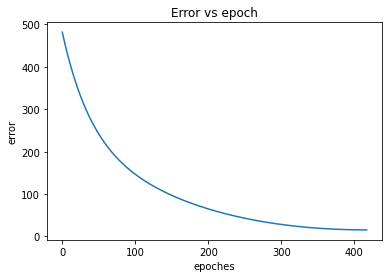

[ 6.24206915 -0.76085538 -3.04278823 -1.96609999 -1.56988985  0.35155695
 -4.91221239 -4.74180963  0.2686205   1.74212801  4.28407335 -0.91308871
 -0.0510474  -2.73424422]
test error: 393.0124024128253


In [19]:
# stochastic gradient descent
regression = LinearRegression(housing.values[:,:13], housing.values[:, 13], learningRate=0.0004,batch_size= 100, l =0.001, tolerance = 0.005, maxIteration= 50000, gd = True, reg = True, sgd = True)
regression.fit()

FOR YACHT DATA

In [20]:
yacht.shape

(307, 7)

In [21]:
regression = LinearRegression(yacht.values[:,:6], yacht.values[:, 6], learningRate=0.001,batch_size= 100, l = 0.001, tolerance = 0.001, maxIteration= 50000)
regression.fit()

Data is Full Rank
Data is not low Rank
Solving using closed form solution
[22.93399433 -0.90751811  1.04796575  0.38867104  0.6622465  -2.17214484
  2.58716716  0.50645061 -2.59559964  2.30818886 -1.67320027 -2.33651383
  0.65618617 -3.99472177]
test error: 21.38160796571934


Data is Full Rank
Data is not low Rank
Solving using Gradient Descent


  0%|          | 4/50000 [00:00<00:08, 5807.27it/s]

epoch: 0 error: 290.69023208701236
The model stopped - no further improvement ended at epoch:  4


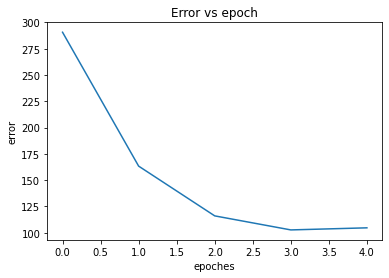

[20.33382816 -1.46213035  1.41935852 -1.58575539  0.92749415 -1.64702607
  3.91401928 -1.18438633 -0.07346836 -0.83941423 -1.52403194 -2.71204039
  1.29520051 -4.10183747]
test error: 118.04233751696694


In [22]:
# gradient descent
regression = LinearRegression(yacht.values[:,:6], yacht.values[:, 6], learningRate=0.001,batch_size= 100, l = 0.01, tolerance = 0.001, maxIteration= 50000, gd = True)
regression.fit()

Data is Full Rank
Data is not low Rank
Solving using Gradient Descent


  0%|          | 4/50000 [00:00<00:43, 1143.95it/s]

epoch: 0 error: 290.69023208701236
The model stopped - no further improvement ended at epoch:  4


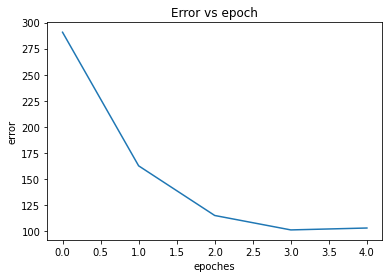

[20.40902275 -1.45616755  1.4121039  -1.5748774   0.93028981 -1.63688114
  3.91836548 -1.17358521 -0.08904966 -0.82715173 -1.51332696 -2.71203923
  1.29075395 -4.10180354]
test error: 116.3723756597664


In [23]:
# gradient descent with regularization
regression = LinearRegression(yacht.values[:,:6], housing.values[:, 6], learningRate=0.001,batch_size= 100, l = 0.001, tolerance = 0.001, maxIteration= 50000, gd = True, reg = True)
regression.fit()

Data is Full Rank
Data is not low Rank
using using Stochastic Gradient Descent


  0%|          | 235/50000 [00:00<00:02, 17038.82it/s]

epoch: 0 error: 1091.5161971683353
epoch: 100 error: 134.16975581361226
epoch: 200 error: 8.841457988826557
The model stopped - no further improvement ended at epoch:  235


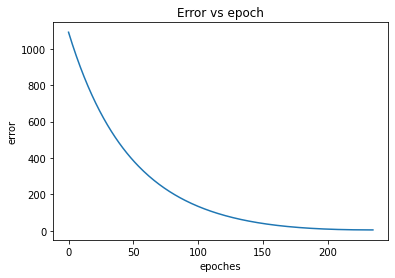

[11.33473752 -3.20267993 -2.47675394  0.72056796 -2.85070366 -2.44967317
  6.02424362  0.43133637 -3.24039711 -6.59619509 -6.28791461 -6.79696644
  2.32464252 -5.51360793]
test error: 579.2922990687462


In [24]:
# SGD
regression = LinearRegression(yacht.values[:,:6], housing.values[:, 6], learningRate=0.001,batch_size= 100, l = 0.001, tolerance = 0.001, maxIteration= 50000, gd = True, reg = True, sgd = True)
regression.fit()

FOR Concrete

In [25]:
concrete.shape

(1029, 9)

In [26]:
regression = LinearRegression(concrete.values[:,:8], concrete.values[:, 8], learningRate=0.0007 ,batch_size= 100, l = 0.001, tolerance = 0.0001, maxIteration= 50000)
regression.fit()

Data is Full Rank
Data is not low Rank
Solving using closed form solution
[22.93399433 -0.90751811  1.04796575  0.38867104  0.6622465  -2.17214484
  2.58716716  0.50645061 -2.59559964  2.30818886 -1.67320027 -2.33651383
  0.65618617 -3.99472177]
test error: 21.38160796571934


Data is Full Rank
Data is not low Rank
Solving using Gradient Descent


  0%|          | 161/50000 [00:00<00:04, 11461.79it/s]

epoch: 0 error: 343.8346697590829
epoch: 100 error: 22.4118804872412
The model stopped - no further improvement ended at epoch:  161


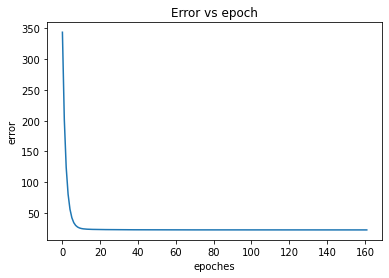

[22.93399433 -0.89834485  1.02957848  0.33684608  0.66945855 -2.15541085
  2.59739088  0.48858631 -2.60131124  2.17438383 -1.52477683 -2.33048068
  0.65523442 -3.98863395]
test error: 21.407185497576577


In [27]:
regression = LinearRegression(concrete.values[:,:8], concrete.values[:, 8], learningRate=0.0007 ,batch_size= 100, l = 0.001, tolerance = 0.0001, maxIteration= 50000, gd = True)
regression.fit()

Data is Full Rank
Data is not low Rank
Solving using Gradient Descent


  0%|          | 127/50000 [00:00<00:07, 7065.80it/s]

epoch: 0 error: 343.8346697590829
epoch: 100 error: 22.438376994220146
The model stopped - no further improvement ended at epoch:  127


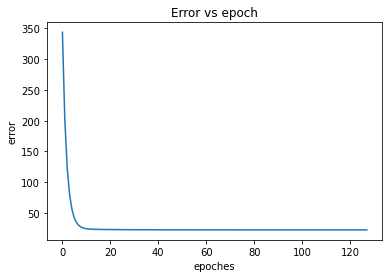

[23.12113423 -0.91270536  1.05826017  0.36144985  0.66545755 -2.25611811
  2.57344171  0.52278618 -2.68709179  2.25117508 -1.55364954 -2.35710233
  0.65662619 -4.0468084 ]
test error: 21.49496511133331


In [28]:
regression = LinearRegression(concrete.values[:,:8], concrete.values[:, 8], learningRate=0.0007 ,batch_size= 100, l = 0.001, tolerance = 0.0001, maxIteration= 50000, gd = True, reg = True)
regression.fit()

Data is Full Rank
Data is not low Rank
using using Stochastic Gradient Descent


  1%|          | 370/50000 [00:00<00:03, 15439.10it/s]

epoch: 0 error: 517.3654651628013
epoch: 100 error: 149.97738430162258
epoch: 200 error: 50.23451014518542
epoch: 300 error: 26.17679364913343
The model stopped - no further improvement ended at epoch:  370


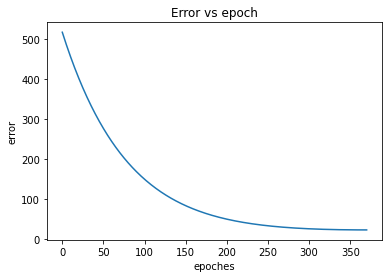

[ 8.84648057 -1.81463251 -0.51727205 -0.26570488 -2.22490327  2.34525143
 -0.37417442  0.18163293 -2.79150545  5.17668977  3.13512633 -7.63122113
  3.33104023 -4.59695776]
test error: 291.9991983294309


In [29]:
regression = LinearRegression(concrete.values[:,:8], concrete.values[:, 8], learningRate=0.0007 ,batch_size= 100, l = 0.001, tolerance = 0.0001, maxIteration= 50000, sgd = True, reg = True)
regression.fit()